In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:

# Configuración de estilo global para los gráficos
sns.set(style="whitegrid") # Un estilo de cuadrícula limpio para todos los gráficos

# Rutas de los datos
# ruta_base apunta al directorio padre del directorio actual donde se ejecuta el notebook
ruta_base = os.path.abspath(os.path.join(os.getcwd(), ".."))
# ruta_gold apunta a la carpeta GOLD dentro de la ruta base
ruta_gold = os.path.join(ruta_base, "GOLD")
ruta_plots = os.path.join(ruta_base, "plots") 

In [11]:

# ==============================================================================
# 1. Cargar datasets existentes desde la capa GOLD
# Estos DataFrames contienen los datos agregados y listos para la visualización.
# ==============================================================================

# Producción total anual de petróleo y gas
df_total_aceite = pd.read_parquet(os.path.join(ruta_gold, "total_anual_petroleo.parquet"))
df_total_gas = pd.read_parquet(os.path.join(ruta_gold, "total_anual_gas.parquet"))

# Promedios de producción diarios por operador
df_promedio_operador_aceite = pd.read_parquet(os.path.join(ruta_gold, "promedio_operador_petroleo.parquet"))
df_promedio_operador_gas = pd.read_parquet(os.path.join(ruta_gold, "promedio_operador_gas.parquet"))

# Totales de producción acumulada por operador
df_total_operador_aceite = pd.read_parquet(os.path.join(ruta_gold, "total_operador_aceite.parquet"))
df_total_operador_gas = pd.read_parquet(os.path.join(ruta_gold, "total_operador_gas.parquet"))

# Top 1 operador por año (producción dominante por año)
df_top1_operador_aceite = pd.read_parquet(os.path.join(ruta_gold, "top1_operador_petroleo_anual.parquet"))
df_top1_operador_gas = pd.read_parquet(os.path.join(ruta_gold, "top1_operador_gas_anual.parquet"))

# Top 10 campos por producción acumulada
df_top10_campos_aceite = pd.read_parquet(os.path.join(ruta_gold, "top10_campos_petroleo.parquet"))
df_top10_campos_gas = pd.read_parquet(os.path.join(ruta_gold, "top10_campos_gas.parquet"))

In [13]:
# ==============================================================================
# 2. Pre-procesamiento y Filtrado de Datos
# Se filtran los datos hasta el año 2024 para las visualizaciones anuales.
# ==============================================================================
df_total_aceite = df_total_aceite[df_total_aceite["anio"] <= 2024]
df_total_gas = df_total_gas[df_total_gas["anio"] <= 2024]

# Asegura orden descendente por producción promedio para gráficos de barras
df_promedio_operador_aceite = df_promedio_operador_aceite.sort_values("petroleo_mbd", ascending=False)
df_promedio_operador_gas = df_promedio_operador_gas.sort_values("gas_natural_sin_nitrogeno_mmpcd", ascending=False)

# Ordenar por volumen total para gráficos de barras logarítmicas
df_total_operador_aceite = df_total_operador_aceite.sort_values("petroleo_mbd", ascending=False)
df_total_operador_gas = df_total_operador_gas.sort_values("gas_natural_sin_nitrogeno_mmpcd", ascending=False)



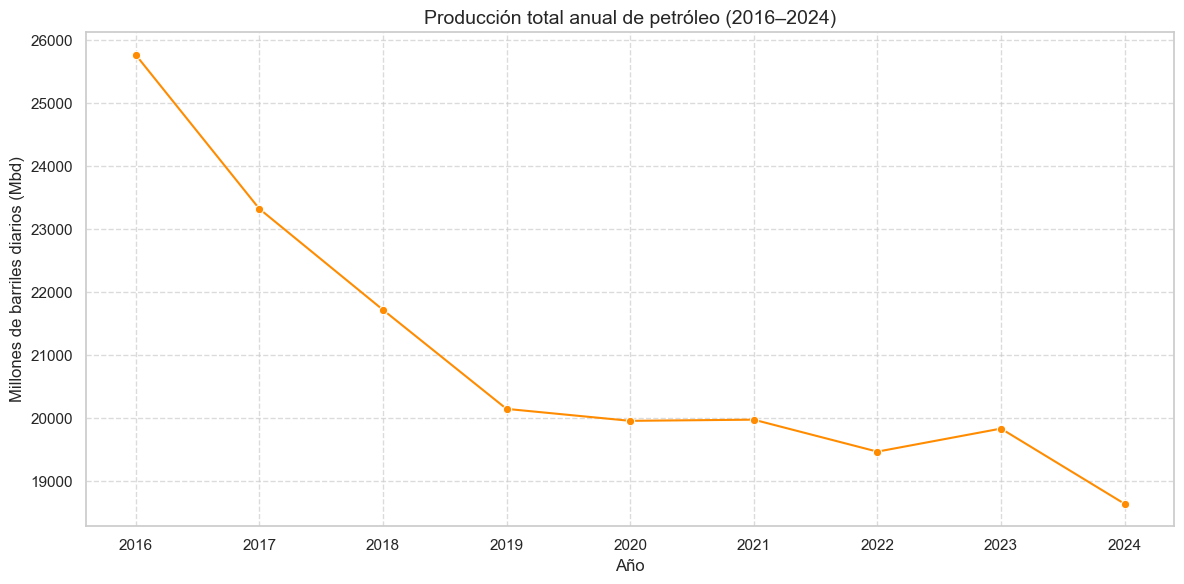

<Figure size 640x480 with 0 Axes>

In [17]:
# ==============================================================================
# 3. Generación de Gráficos de Insights
# Cada bloque genera un gráfico específico para comunicar un hallazgo.
# ==============================================================================

# ------------------------------------------------------------------------------
# Gráfico 1: Producción Total Anual de Petróleo
# Insight: Muestra la tendencia general de la producción de petróleo en México a lo largo de los años.
# ------------------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_aceite, x="anio", y="petroleo_mbd", marker="o", color="darkorange")
plt.title("Producción total anual de petróleo (2016–2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Millones de barriles diarios (Mbd)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "produccion_anual_petroleo.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


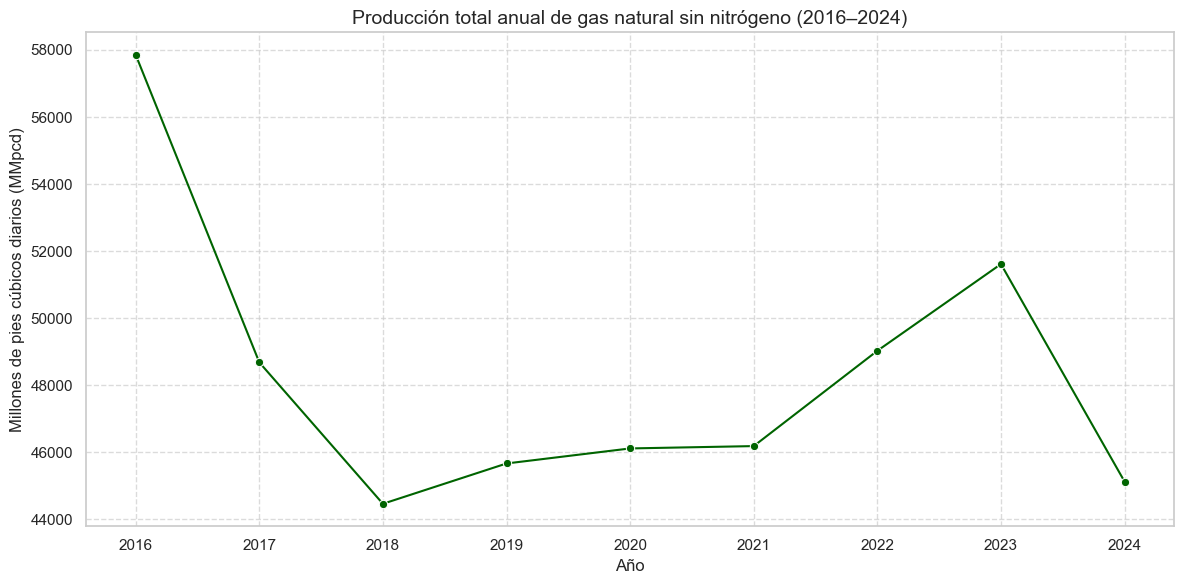

<Figure size 640x480 with 0 Axes>

In [19]:
# ------------------------------------------------------------------------------
# Gráfico 2: Producción Total Anual de Gas Natural sin Nitrógeno
# Insight: Muestra la tendencia general de la producción de gas natural sin nitrógeno en México.
# ------------------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_total_gas,
    x="anio",
    y="gas_natural_sin_nitrogeno_mmpcd",
    marker="o",
    color="darkgreen"
)
plt.title("Producción total anual de gas natural sin nitrógeno (2016–2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Millones de pies cúbicos diarios (MMpcd)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "produccion_anual_gas.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico

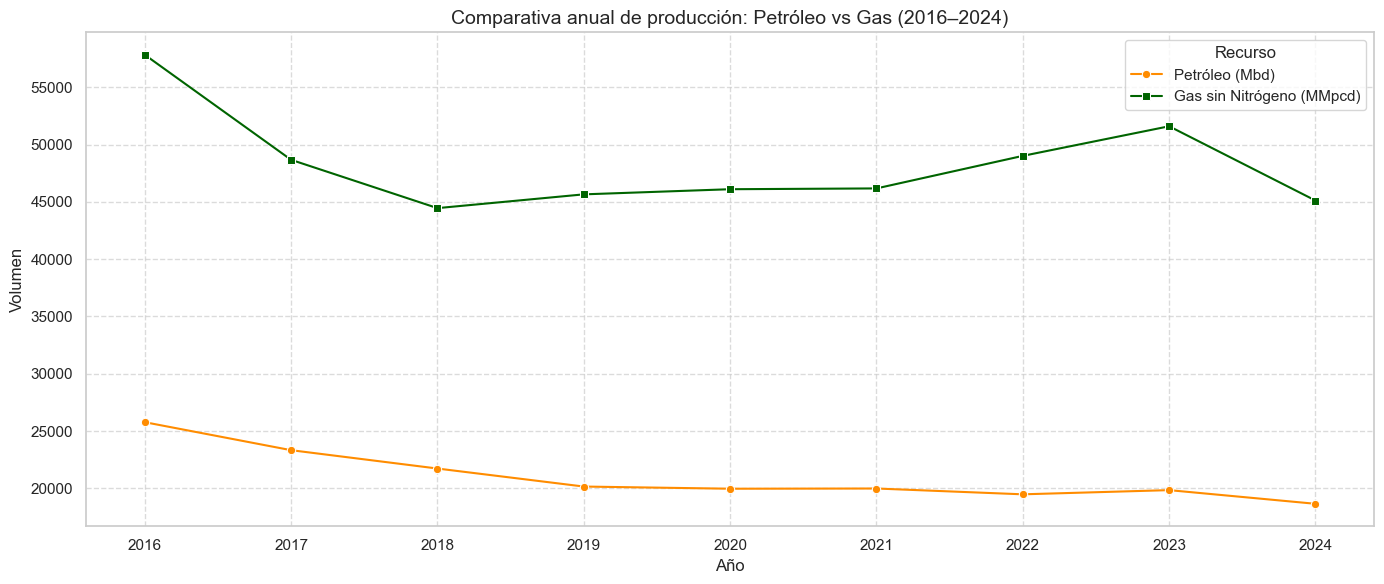

<Figure size 640x480 with 0 Axes>

In [21]:
# ------------------------------------------------------------------------------
# Gráfico 3: Comparativa Anual de Producción: Petróleo vs Gas
# Insight: Permite comparar las tendencias de producción de ambos recursos en el mismo gráfico,
# identificando si se mueven en patrones similares o divergentes.
# ------------------------------------------------------------------------------
# Unir ambos DataFrames por año
df_comparativa = pd.merge(
    df_total_aceite[["anio", "petroleo_mbd"]],
    df_total_gas[["anio", "gas_natural_sin_nitrogeno_mmpcd"]],
    on="anio"
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_comparativa, x="anio", y="petroleo_mbd", marker="o", label="Petróleo (Mbd)", color="darkorange")
sns.lineplot(data=df_comparativa, x="anio", y="gas_natural_sin_nitrogeno_mmpcd", marker="s", label="Gas sin Nitrógeno (MMpcd)", color="darkgreen")
plt.title("Comparativa anual de producción: Petróleo vs Gas (2016–2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Volumen", fontsize=12)
plt.legend(title="Recurso")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "comparativa_anual_petroleo_gas.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


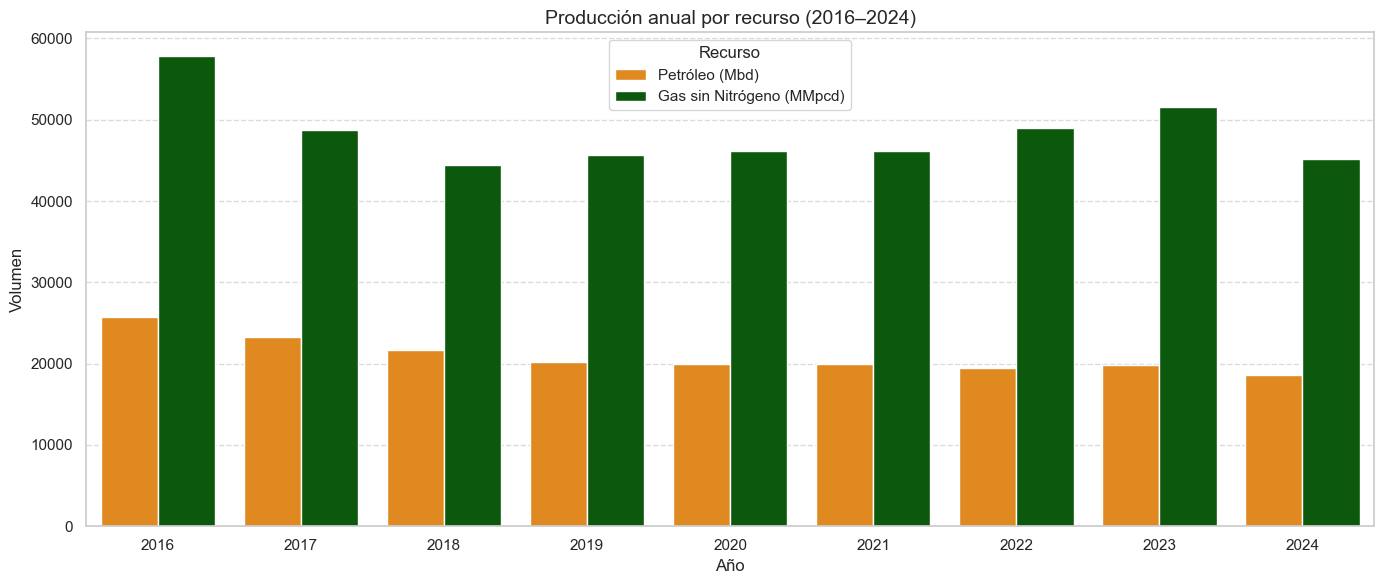

<Figure size 640x480 with 0 Axes>

In [23]:
# ------------------------------------------------------------------------------
# Gráfico 4: Producción Anual por Recurso (Barras Agrupadas)
# Insight: Ofrece una visión de las contribuciones anuales de petróleo y gas,
# facilitando la comparación directa de volúmenes por año.
# ------------------------------------------------------------------------------
# Formato largo para seaborn (melt)
df_largo = df_comparativa.melt(id_vars="anio",
                                value_vars=["petroleo_mbd", "gas_natural_sin_nitrogeno_mmpcd"],
                                var_name="recurso",
                                value_name="volumen")

# Renombrar para títulos más bonitos en la leyenda
df_largo["recurso"] = df_largo["recurso"].replace({
    "petroleo_mbd": "Petróleo (Mbd)",
    "gas_natural_sin_nitrogeno_mmpcd": "Gas sin Nitrógeno (MMpcd)"
})

plt.figure(figsize=(14, 6))
sns.barplot(data=df_largo, x="anio", y="volumen", hue="recurso", palette={"Petróleo (Mbd)": "darkorange", "Gas sin Nitrógeno (MMpcd)": "darkgreen"})
plt.title("Producción anual por recurso (2016–2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Volumen", fontsize=12)
plt.legend(title="Recurso")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula solo en el eje Y para barras
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "produccion_anual_recurso_barras.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico

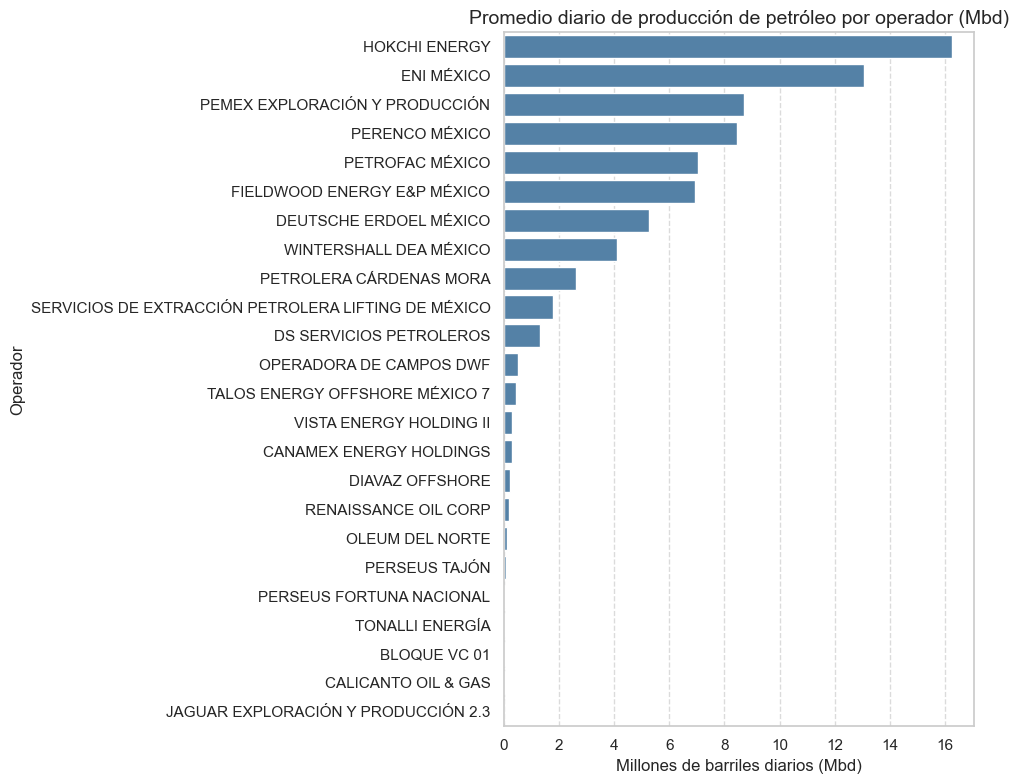

<Figure size 640x480 with 0 Axes>

In [25]:
# ------------------------------------------------------------------------------
# Gráfico 5: Promedio Diario de Producción de Petróleo por Operador
# Insight: Muestra la contribución promedio diaria de petróleo por cada operador,
# útil para identificar los productores consistentes.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 8)) # Aumentar altura para mejor legibilidad de operadores
sns.barplot(
    data=df_promedio_operador_aceite,
    x="petroleo_mbd",
    y="operador",
    color="steelblue"
)
plt.title("Promedio diario de producción de petróleo por operador (Mbd)", fontsize=14)
plt.xlabel("Millones de barriles diarios (Mbd)", fontsize=12)
plt.ylabel("Operador", fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "promedio_diario_petroleo_operador.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


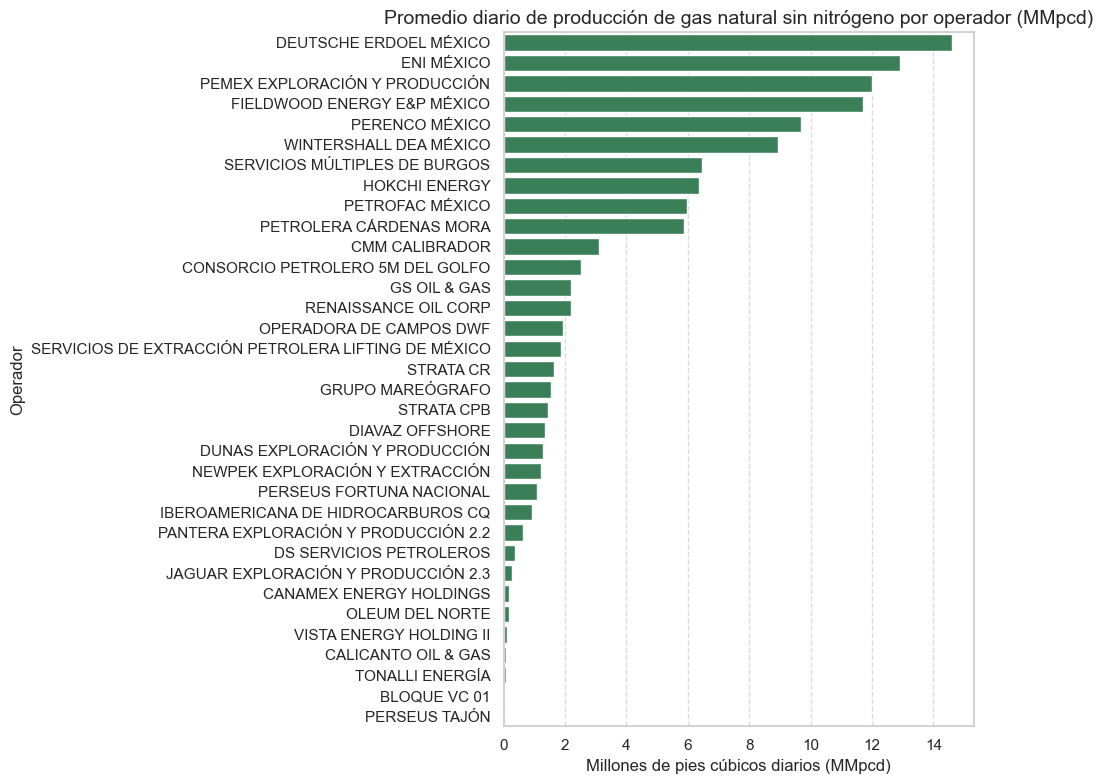

<Figure size 640x480 with 0 Axes>

In [27]:
# ------------------------------------------------------------------------------
# Gráfico 6: Promedio Diario de Producción de Gas Natural sin Nitrógeno por Operador
# Insight: Similar al petróleo, pero para gas, identificando los principales productores diarios de gas.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 8)) # Aumentar altura
sns.barplot(
    data=df_promedio_operador_gas,
    x="gas_natural_sin_nitrogeno_mmpcd",
    y="operador",
    color="seagreen"
)
plt.title("Promedio diario de producción de gas natural sin nitrógeno por operador (MMpcd)", fontsize=14)
plt.xlabel("Millones de pies cúbicos diarios (MMpcd)", fontsize=12)
plt.ylabel("Operador", fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "promedio_diario_gas_operador.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


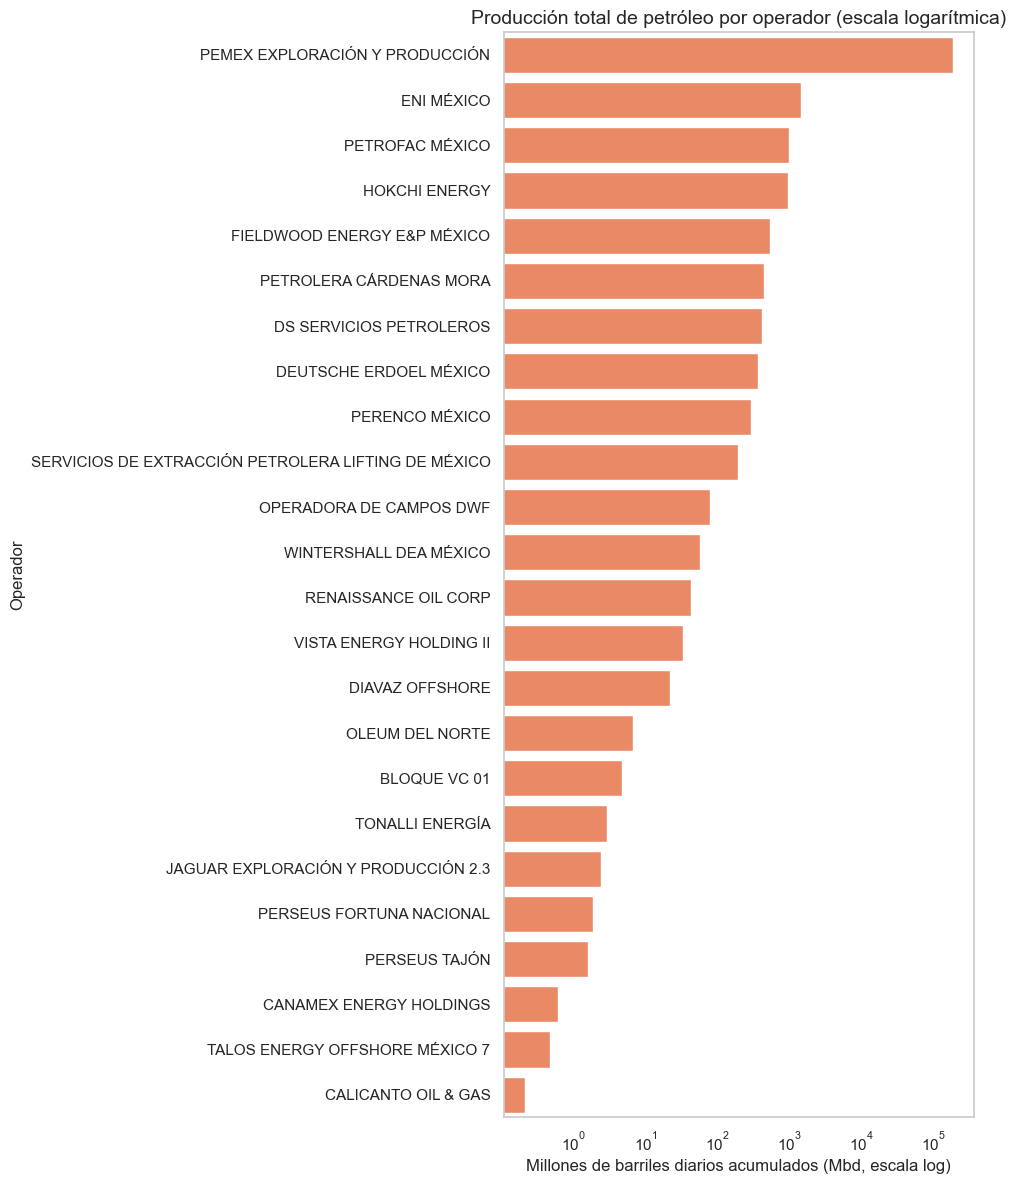

<Figure size 640x480 with 0 Axes>

In [29]:
# ------------------------------------------------------------------------------
# Gráfico 7: Producción Total de Petróleo por Operador (Escala Logarítmica)
# Insight: Permite visualizar la contribución de todos los operadores, incluyendo los pequeños,
# al comprimir la escala para los valores grandes y expandirla para los pequeños.
# Muestra la hegemonía de PEMEX y la existencia de otros productores.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 12)) # Aumentar altura para más operadores
sns.barplot(
    data=df_total_operador_aceite,
    y="operador",
    x="petroleo_mbd",
    color="coral"
)
plt.xscale("log") # Aplicación de escala logarítmica
plt.title("Producción total de petróleo por operador (escala logarítmica)", fontsize=14)
plt.xlabel("Millones de barriles diarios acumulados (Mbd, escala log)", fontsize=12)
plt.ylabel("Operador", fontsize=12)
plt.grid(False) # Desactivar las líneas internas de la cuadrícula para evitar ruido visual en escala logarítmica
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "produccion_total_petroleo_operador_log.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


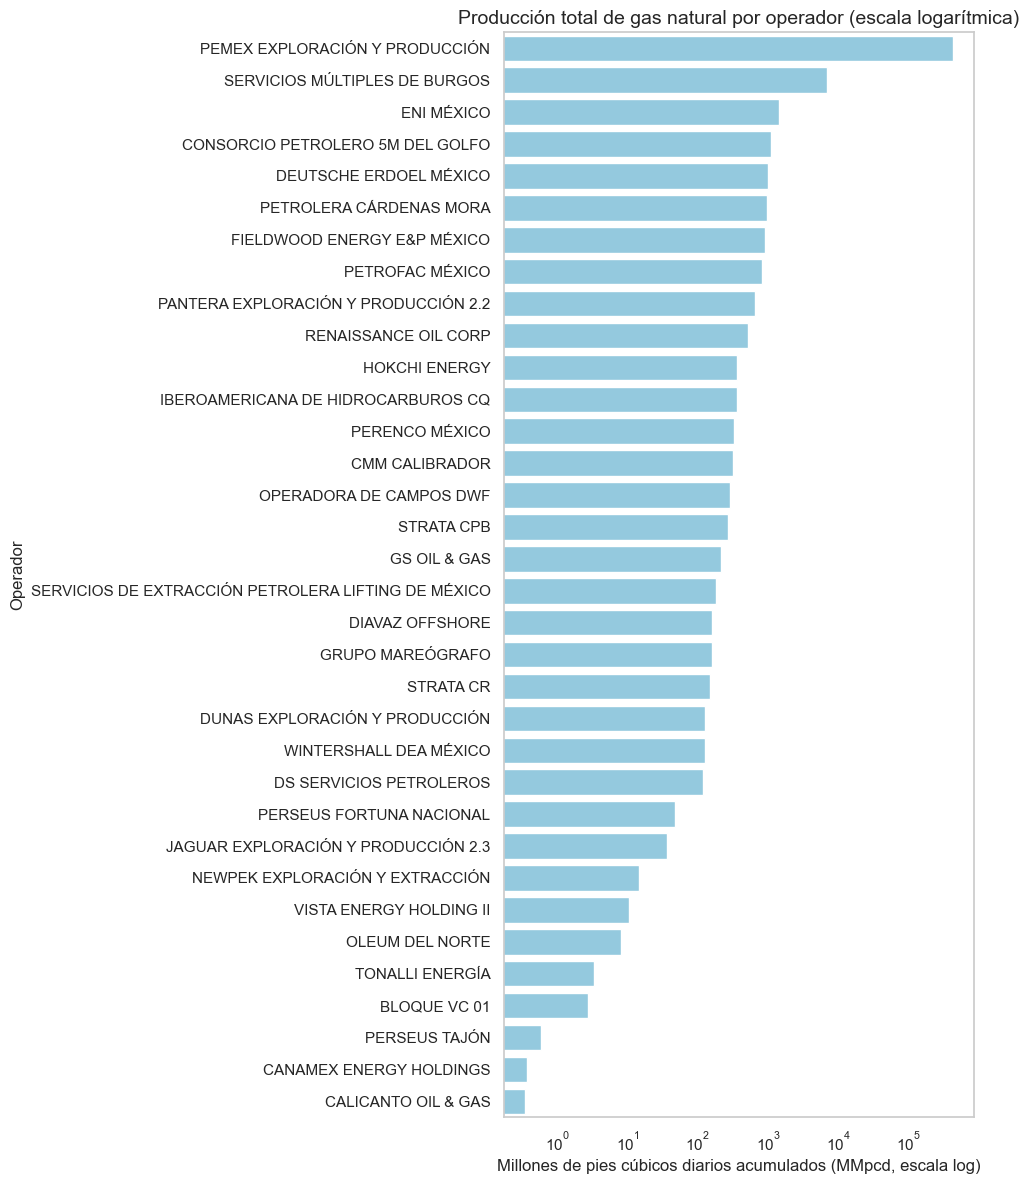

<Figure size 640x480 with 0 Axes>

In [31]:
# ------------------------------------------------------------------------------
# Gráfico 8: Producción Total de Gas Natural por Operador (Escala Logarítmica)
# Insight: Similar al petróleo, pero para gas, mostrando la distribución de la producción
# entre todos los operadores, destacando la magnitud de los grandes y la visibilidad de los pequeños.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 12)) # Aumentar altura
sns.barplot(
    data=df_total_operador_gas,
    y="operador",
    x="gas_natural_sin_nitrogeno_mmpcd",
    color="skyblue"
)
plt.xscale("log") # Aplicación de escala logarítmica
plt.title("Producción total de gas natural por operador (escala logarítmica)", fontsize=14)
plt.xlabel("Millones de pies cúbicos diarios acumulados (MMpcd, escala log)", fontsize=12)
plt.ylabel("Operador", fontsize=12)
plt.grid(False) # Desactivar líneas de la cuadrícula
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "produccion_total_gas_operador_log.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico



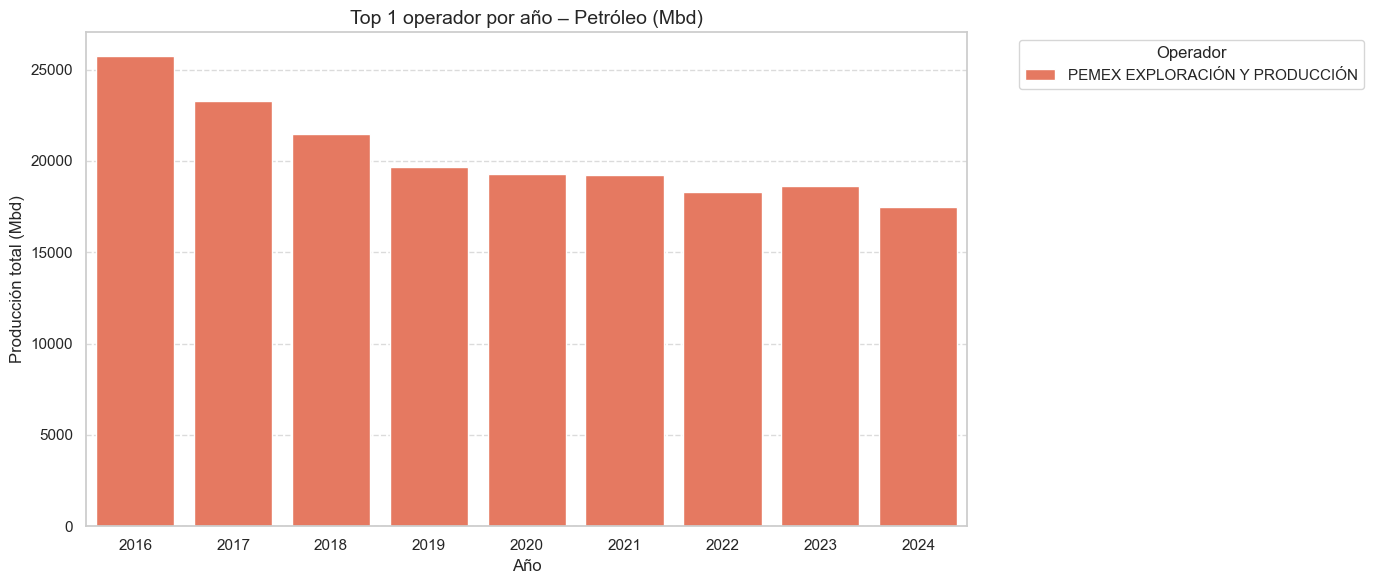

<Figure size 640x480 with 0 Axes>

In [35]:
# ------------------------------------------------------------------------------
# Gráfico 9: Top 10 Operadores de Petróleo por Producción Acumulada
# Insight: Enfoca la atención en los operadores más grandes, excluyendo a PEMEX si su dominancia
# distorsiona la visualización de los "siguientes" más importantes.
# ------------------------------------------------------------------------------
# Filtrar hasta 2024 (para top 1 operador anual)
df_top1_operador_aceite = df_top1_operador_aceite[df_top1_operador_aceite["anio"] <= 2024]
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_top1_operador_aceite,
    x="anio",
    y="petroleo_mbd",
    hue="operador",
    palette="Reds_r" # Paleta de colores para diferenciar operadores
)
plt.title("Top 1 operador por año – Petróleo (Mbd)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción total (Mbd)", fontsize=12)
plt.legend(title="Operador", bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda para no superponer
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "top10_operadores_petroleo.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


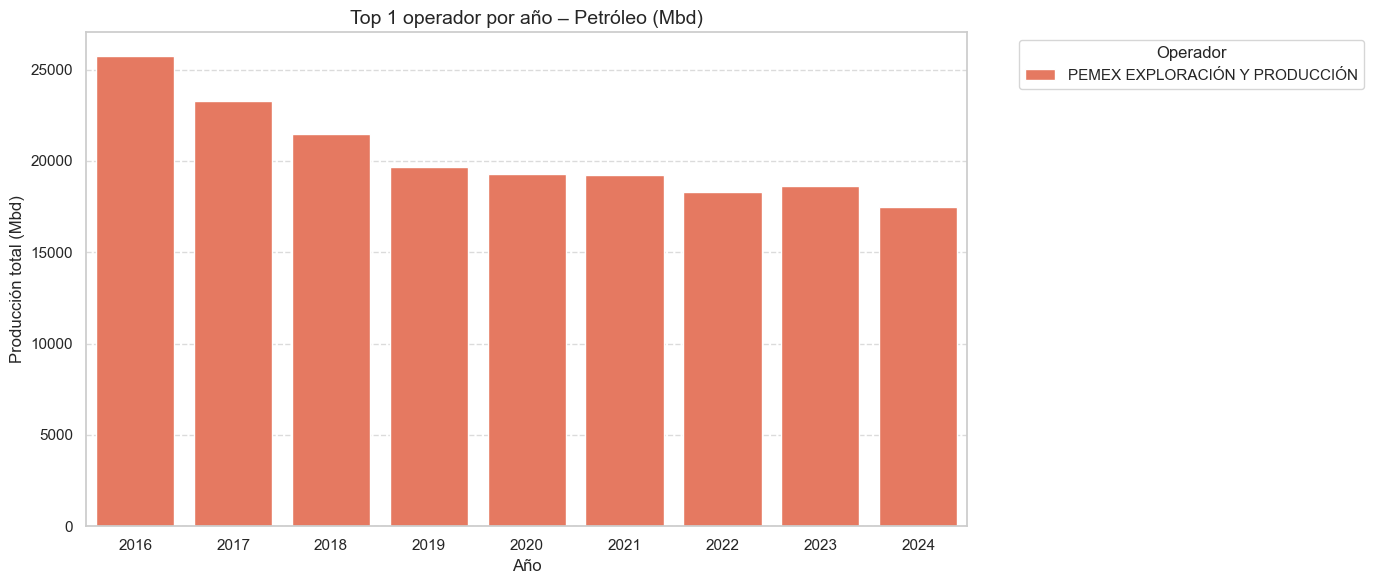

<Figure size 640x480 with 0 Axes>

In [37]:
# ------------------------------------------------------------------------------
# Gráfico 10: Top 1 Operador por Año – Petróleo
# Insight: Muestra qué operador ha sido el principal productor de petróleo en cada año,
# destacando la consistencia o los cambios en el liderazgo anual.
# ------------------------------------------------------------------------------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_top1_operador_aceite,
    x="anio",
    y="petroleo_mbd",
    hue="operador",
    palette="Reds_r" # Paleta de colores para diferenciar operadores
)
plt.title("Top 1 operador por año – Petróleo (Mbd)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción total (Mbd)", fontsize=12)
plt.legend(title="Operador", bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda para no superponer
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "top1_operador_anual_petroleo.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico



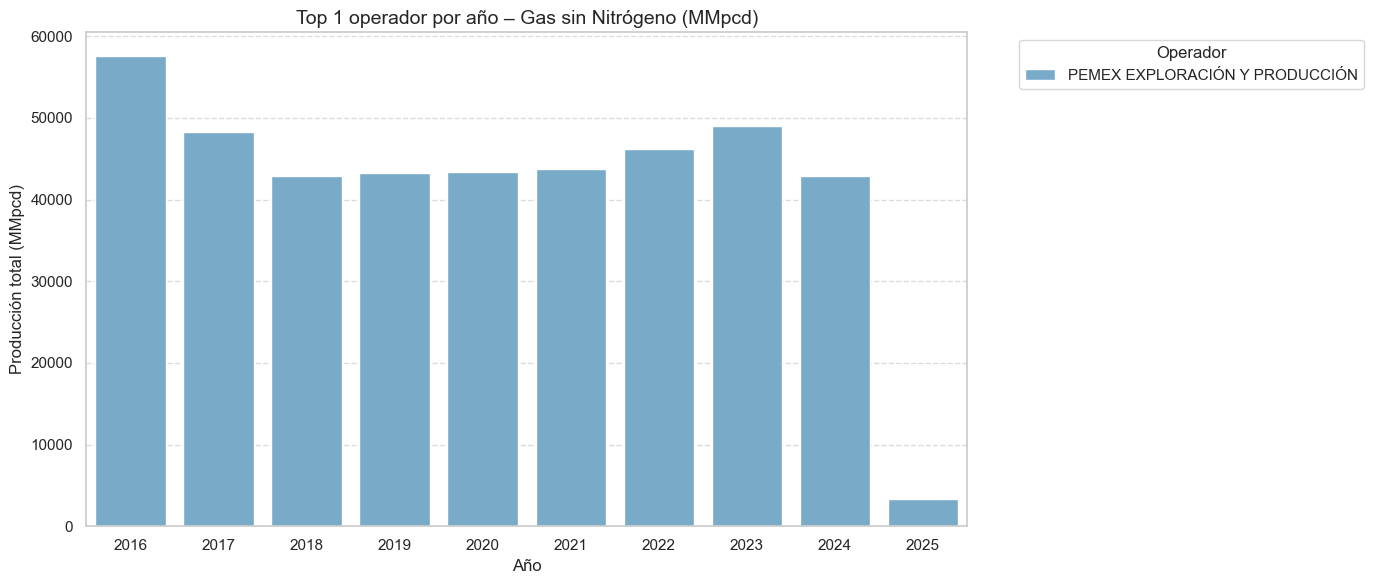

<Figure size 640x480 with 0 Axes>

In [41]:
# ------------------------------------------------------------------------------
# Gráfico 11: Top 1 Operador por Año – Gas sin Nitrógeno
# Insight: Similar al petróleo, pero para gas, mostrando el liderazgo anual en la producción de gas.
# ------------------------------------------------------------------------------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_top1_operador_gas,
    x="anio",
    y="gas_natural_sin_nitrogeno_mmpcd",
    hue="operador",
    palette="Blues_r" # Paleta de colores para diferenciar operadores
)
plt.title("Top 1 operador por año – Gas sin Nitrógeno (MMpcd)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción total (MMpcd)", fontsize=12)
plt.legend(title="Operador", bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "top1_operador_anual_gas.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico



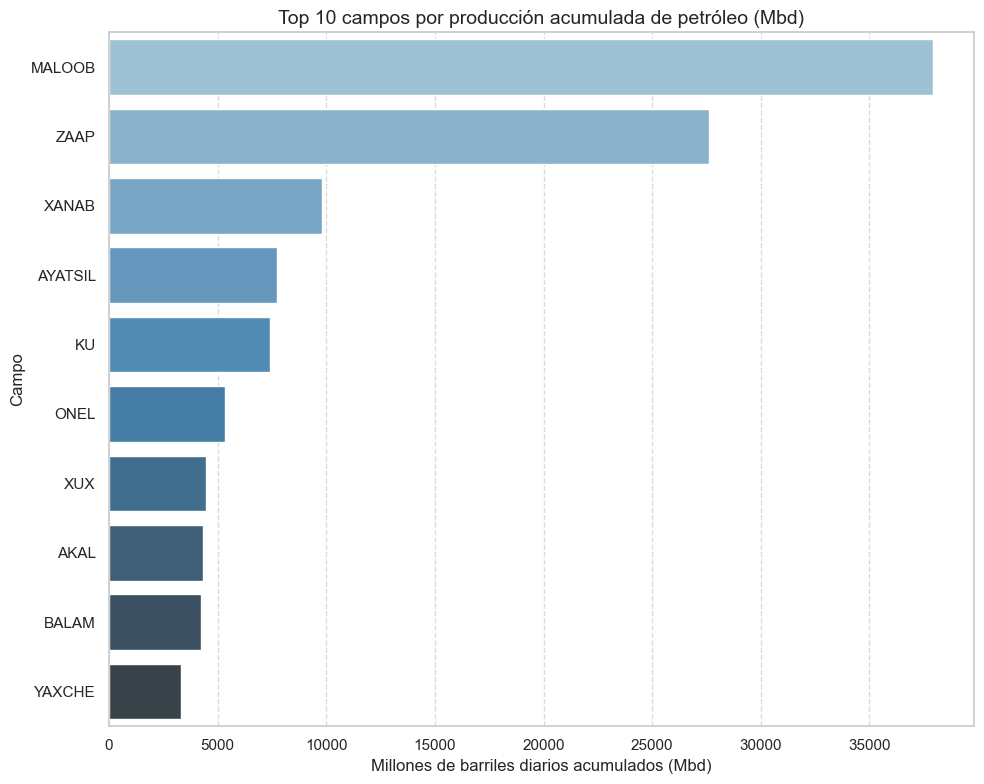

<Figure size 640x480 with 0 Axes>

In [43]:
# ------------------------------------------------------------------------------
# Gráfico 12: Top 10 Campos por Producción Acumulada de Petróleo
# Insight: Identifica los campos individuales más productivos de petróleo,
# crucial para entender la fuente de la producción nacional.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 8)) # Aumentar altura
sns.barplot(
    data=df_top10_campos_aceite.sort_values("petroleo_mbd", ascending=False), # Asegurar orden
    y="campo", x="petroleo_mbd",
    hue="campo", # Corrección para evitar FutureWarning
    palette="Blues_d", # Usar una paleta de un solo tono para barras
    legend=False # No se necesita leyenda si el color es por el mismo campo
)
plt.title("Top 10 campos por producción acumulada de petróleo (Mbd)", fontsize=14)
plt.xlabel("Millones de barriles diarios acumulados (Mbd)", fontsize=12)
plt.ylabel("Campo", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "top10_campos_petroleo.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico


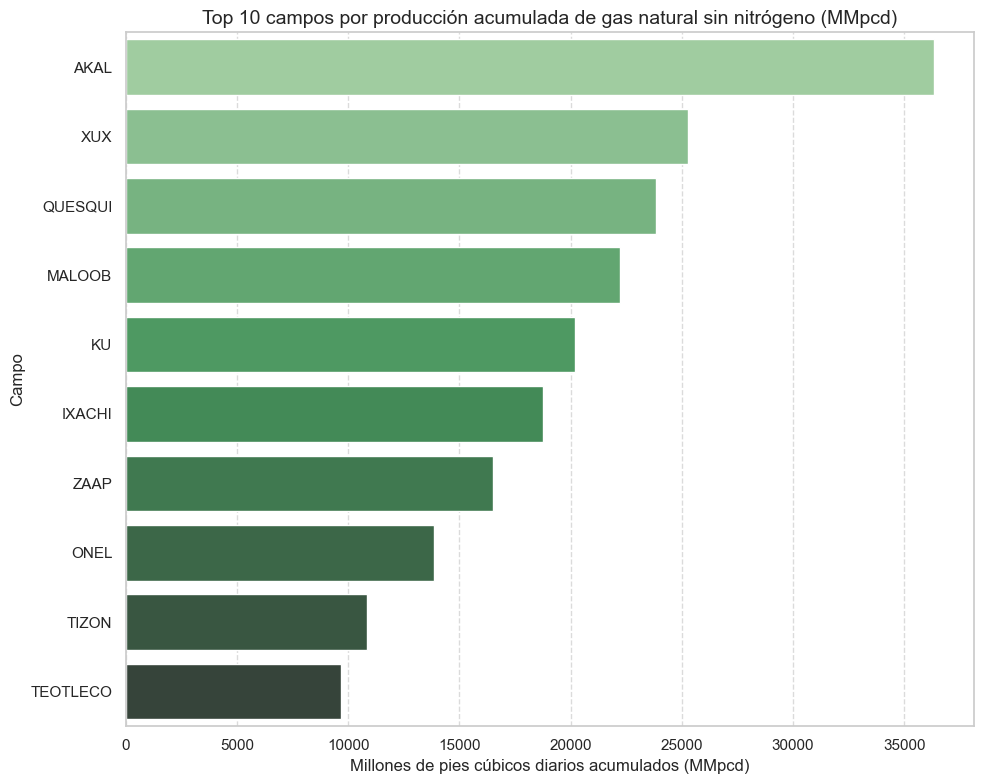

Generación de gráficos completada. Revisa la carpeta 'plots/' para las imágenes.


<Figure size 640x480 with 0 Axes>

In [45]:

# ------------------------------------------------------------------------------
# Gráfico 13: Top 10 Campos por Producción Acumulada de Gas Natural sin Nitrógeno
# Insight: Identifica los campos individuales más productivos de gas natural,
# proporcionando una visión detallada de las fuentes de gas.
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 8)) # Aumentar altura
sns.barplot(
    data=df_top10_campos_gas.sort_values("gas_natural_sin_nitrogeno_mmpcd", ascending=False), # Asegurar orden
    y="campo", x="gas_natural_sin_nitrogeno_mmpcd",
    hue="campo", # Corrección para evitar FutureWarning
    palette="Greens_d", # Usar una paleta de un solo tono
    legend=False
)
plt.title("Top 10 campos por producción acumulada de gas natural sin nitrógeno (MMpcd)", fontsize=14)
plt.xlabel("Millones de pies cúbicos diarios acumulados (MMpcd)", fontsize=12)
plt.ylabel("Campo", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(ruta_plots, "top10_campos_gas.png")) # Guarda el gráfico
plt.show()
plt.clf() # Limpia la figura para el siguiente gráfico

print("Generación de gráficos completada. Revisa la carpeta 'plots/' para las imágenes.")
